#Необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plpt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm

In [ ]:
pd.options.display.max_columns=20

#DataLoad

In [ ]:
!git clone https://github.com/Lasttrader/DA_repo
!pip install ucimlrepo

Cloning into 'DA_repo'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 69 (delta 3), reused 1 (delta 0), pack-reused 58 (from 1)
Receiving objects: 100% (69/69), 31.82 MiB | 19.99 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [ ]:
path = '/content/DA_repo/insurance.csv'

In [ ]:
df = pd.read_csv(path)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#New dataset with forest fires

In [ ]:

from ucimlrepo import fetch_ucirepo

heart_disease = fetch_ucirepo(id=162)


Data Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


#Numerical vs Categ.

In [ ]:
numerical = df.describe().columns
categorical = df.describe(include ='object').columns

#Initial numerical data analysics


*   Correlarion
*   Some graphs







In [ ]:
numerical

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

<Axes: >

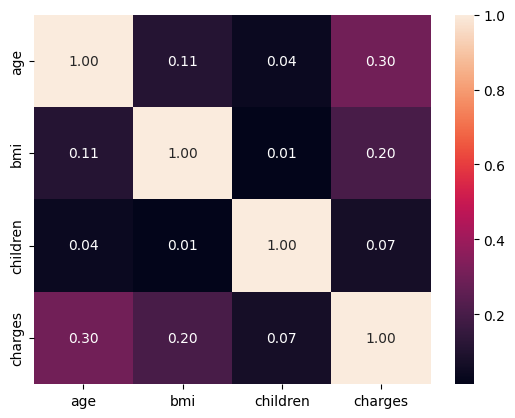

In [ ]:
sns.heatmap(df[numerical].corr(),annot =True,fmt='.2f')

In [ ]:
numerical = numerical.delete(-1)


In [ ]:
numerical

Index(['age', 'bmi', 'children'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler().fit(df[numerical])

In [ ]:
scaled = scaler.transform(df[numerical])
df_ = pd.DataFrame(scaled)

<Axes: >

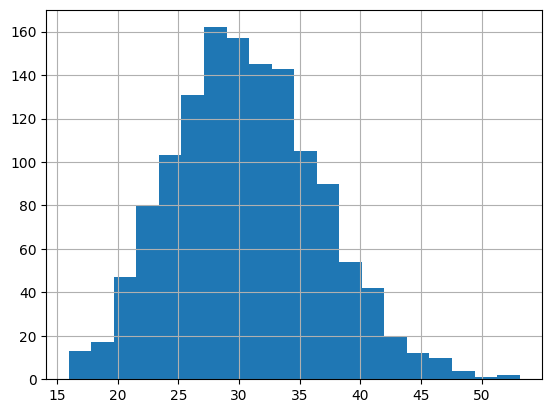

In [ ]:
df.bmi.hist(bins=20)

#Building regression model only on numerical data using pipeline

1.   import necessary libraries
2.   Splitting the data
3.   Building the model
4.   Measure quality









In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [ ]:
X = df[numerical]
Y = df['charges']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3)

In [ ]:
#from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline(
    [
        ('Scaler',StandardScaler()),
        ('Regression',LinearRegression())
    ]
)
pipe.fit(X_train,Y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('Regression', LinearRegression())])

In [ ]:
mean_absolute_error(Y_test,pipe.predict(X_test))

8886.567048211302

In [ ]:
df['charges'].mean()

np.float64(13270.422265141257)

In [ ]:
mean_absolute_error(Y_test,pipe.predict(X_test)) / df['charges'].mean()

np.float64(0.6676454199405172)

In [ ]:
numerical

Index(['age', 'bmi', 'children'], dtype='object')

In [ ]:
pipe.named_steps.Regression.coef_

array([3424.65951161, 1974.09648765,  610.05971351])

#EDA - Exploratory Data Analysis

*   importing seaborn,matplotlib
*   list of categorical columns
*   sns.catplot for showing target depency from categorical columns





In [ ]:
len(categorical)

3

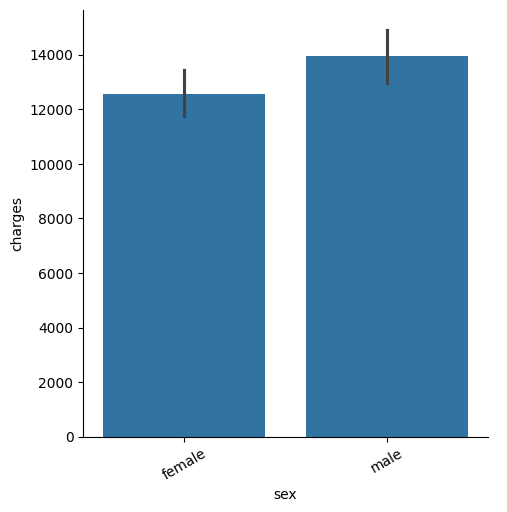

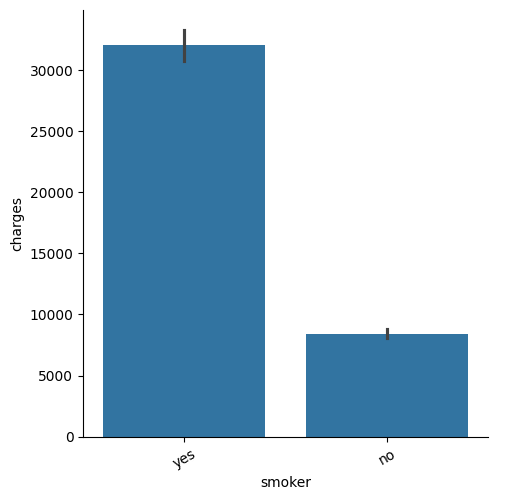

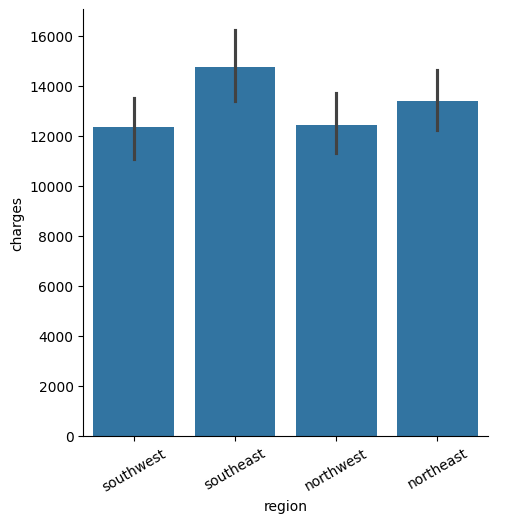

In [ ]:
for col in categorical:
    g = sns.catplot(data=df,x=col,y='charges',kind = 'bar')
    g.set_xticklabels(rotation = 30)

In [ ]:
df = df.drop(['region','sex'],axis=1)

#Categorical data encoding

1.   one-hot
2.   encoding categorical columns



In [ ]:
categorical = df.describe(include='object').columns

In [ ]:
for col in categorical:
    temp_df = pd.get_dummies(df[col],drop_first=True,dtype='int32')
    df = pd.concat((df,temp_df),axis=1)
    df = df.drop(col,axis=1)

In [ ]:
df.head()

,age,bmi,children,charges,yes
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0


#Include categorical data into model

In [ ]:
X = df.drop('charges',axis=1)
Y = df['charges']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
pipe = Pipeline(
    [
        ('Scaler',StandardScaler()),
        ('Regression',LinearRegression())
    ]
)
pipe.fit(X_train,Y_train)
mean_absolute_error(Y_test,pipe.predict(X_test))
Y_pred = pipe.predict(X_test)

In [ ]:
df.head()

,age,bmi,children,charges,yes
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0


In [ ]:
pipe.named_steps.Regression.coef_

array([3595.73759942, 1969.18683209,  706.94652347, 9349.3563525 ])

In [ ]:
df.head()

,age,bmi,children,charges,yes
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0


In [ ]:
4010.5491460941/df.charges.mean()

np.float64(0.3022171462191531)

In [ ]:

import plotly.express as px
import plotly.graph_objects as go

model = LinearRegression()
Y_test = np.array(Y_test)
model.fit(Y_test.reshape(-1,1),Y_pred)
A = model.coef_[0]
B = model.intercept_

x_fit = np.linspace(min(Y_test)-0.5, max(Y_test)+0.5, 100)
y_fit = model.predict(x_fit.reshape(-1, 1))

fig = px.scatter(
    x=Y_test,
    y=Y_pred,
    labels={'x': 'Истинные значения (y_true)', 'y': 'Предсказанные значения (y_pred)'},
    title=f'Линейная регрессия: y_pred = {A:.2f}*y_true + {B:.2f}',
    width=700,
    height=500
)

fig.add_trace(go.Scatter(
    x=x_fit,
    y=y_fit,
    mode='lines',
    name='Регрессия',
    line=dict(color='red', width=3)
))



fig.show()